## CIA Functionality in MATS

Collision induced absorption (CIA) is a broadband effect stemming from intermolecular interactions leading to a collisionally-induced dipole.  Traditionally, CIA is treated as the remaining absorption after modeling baseline and resonant absorption.  To accomodate this approach, MATS allows for the input of a static CIA for each spectrum to account for in the fitting solution.  The example below takes synthetic spectra that include CIA, evalutates using the initial line list, generates a CIA for each spectrum and loads to the spectrum objects, and then fits the line shape parameters.

In [1]:
## Multi- Spectrum Fitting by Segment

import numpy as np
import pandas as pd
import qgrid
import os, sys
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline


sys.path.append(r'C:\Users\ema3\Documents\MATS\MATS')# set location of HAPI.py module
%matplotlib inline
#from hapi import *
from MATS import *


import seaborn as sns
sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_context("poster")


HAPI version: 1.1.0.9.6
To get the most up-to-date version please check http://hitran.org/hapi
ATTENTION: Python versions of partition sums from TIPS-2017 are now available in HAPI code

           It is free to use HAPI. If you use HAPI in your research or software development,
           please cite it using the following reference:
           R.V. Kochanov, I.E. Gordon, L.S. Rothman, P. Wcislo, C. Hill, J.S. Wilzewski,
           HITRAN Application Programming Interface (HAPI): A comprehensive approach
           to working with spectroscopic data, J. Quant. Spectrosc. Radiat. Transfer 177, 15-30 (2016)
           DOI: 10.1016/j.jqsrt.2016.03.005


## Generate Spectrum Objects

The provided spectra were simulated in MATS offline using the Drouin 2017 Oxygen A-Band line list and also include the CIA reported in that work. 

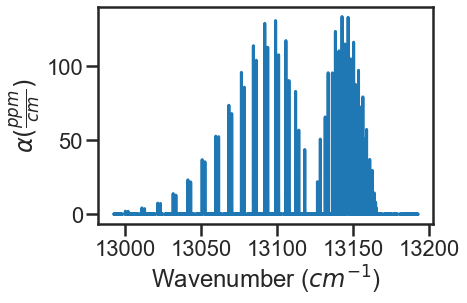

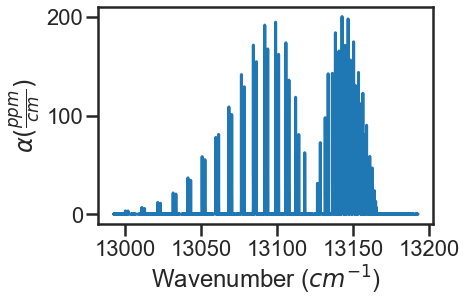

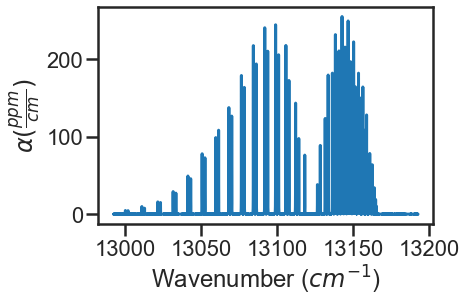

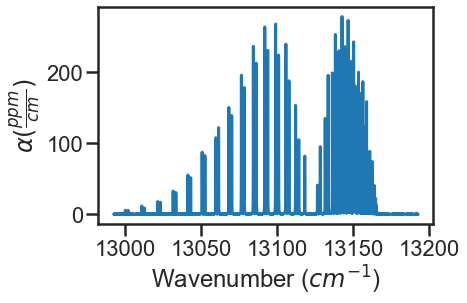

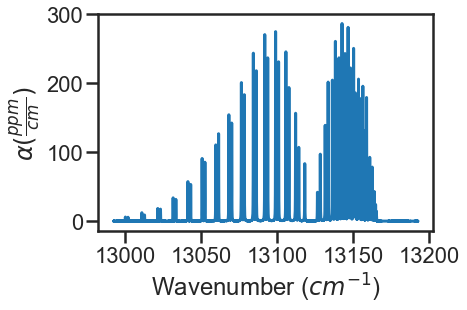

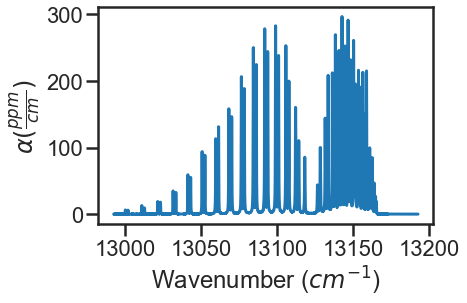

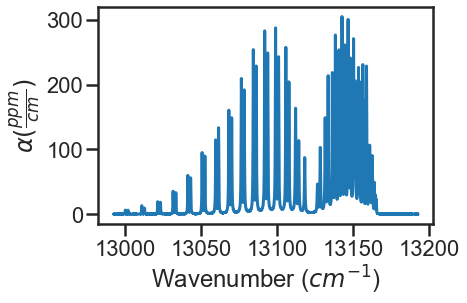

In [2]:
#Read-In Simulated Drouin A-Band Spectra

path = r'C:\Users\ema3\Documents\MATS\MATS\Examples\A-Band - CIA' # Location of the Summary Data File
os.chdir(path)


IntensityThreshold = 1e-30 #intensities must be above this value to be simulated
Fit_Intensity = 1e-26#intensities must be above this value for the line to be fit
wave_range = 1.5 #range outside of experimental x-range to simulate
segment_column = None
etalon = {}
sample_concentration = {7:  0.209}



freq_column = 'Wavenumber + Noise (cm-1)'
tau_column = 'Alpha + LM + CIA'
pressure_column = 'Pressure (Torr)'
temp_column = 'Temperature (C)'
order_baseline_fit = 2



spec_1 = Spectrum(  '100 Torr', 
                            molefraction = sample_concentration, natural_abundance = True, diluent = 'air', 
                            etalons = etalon, 
                            input_freq = False, frequency_column = freq_column,
                            input_tau = False, tau_column = tau_column, tau_stats_column = None, 
                            pressure_column = pressure_column, temperature_column = temp_column,#segment_column = segment_column, 
                            nominal_temperature = 296, x_shift = 0, baseline_order = order_baseline_fit)
spec_2 = Spectrum(  '200 Torr', 
                            molefraction = sample_concentration, natural_abundance = True, diluent = 'air', 
                            etalons = etalon, 
                            input_freq = False, frequency_column = freq_column,
                            input_tau = False, tau_column = tau_column, tau_stats_column = None, 
                            pressure_column = pressure_column, temperature_column = temp_column,#segment_column = segment_column, 
                            nominal_temperature = 296, x_shift = 0, baseline_order = order_baseline_fit)
spec_3 = Spectrum(  '400 Torr', 
                            molefraction = sample_concentration, natural_abundance = True, diluent = 'air', 
                            etalons = etalon, 
                            input_freq = False, frequency_column = freq_column,
                            input_tau = False, tau_column = tau_column, tau_stats_column = None, 
                            pressure_column = pressure_column, temperature_column = temp_column,#segment_column = segment_column, 
                            nominal_temperature = 296, x_shift = 0, baseline_order = order_baseline_fit)
spec_4 = Spectrum(  '700 Torr', 
                            molefraction = sample_concentration, natural_abundance = True, diluent = 'air', 
                            etalons = etalon, 
                            input_freq = False, frequency_column = freq_column,
                            input_tau = False, tau_column = tau_column, tau_stats_column = None, 
                            pressure_column = pressure_column, temperature_column = temp_column,#segment_column = segment_column, 
                            nominal_temperature = 296, x_shift = 0, baseline_order = order_baseline_fit)
spec_5 = Spectrum(  '1000 Torr', 
                            molefraction = sample_concentration, natural_abundance = True, diluent = 'air', 
                            etalons = etalon, 
                            input_freq = False, frequency_column = freq_column,
                            input_tau = False, tau_column = tau_column, tau_stats_column = None, 
                            pressure_column = pressure_column, temperature_column = temp_column,#segment_column = segment_column, 
                            nominal_temperature = 296, x_shift = 0, baseline_order = order_baseline_fit)
spec_6 = Spectrum(  '2000 Torr', 
                            molefraction = sample_concentration, natural_abundance = True, diluent = 'air', 
                            etalons = etalon, 
                            input_freq = False, frequency_column = freq_column,
                            input_tau = False, tau_column = tau_column, tau_stats_column = None, 
                            pressure_column = pressure_column, temperature_column = temp_column,#segment_column = segment_column, 
                            nominal_temperature = 296, x_shift = 0, baseline_order = order_baseline_fit)
spec_7 = Spectrum(  '3000 Torr', 
                            molefraction = sample_concentration, natural_abundance = True, diluent = 'air', 
                            etalons = etalon, 
                            input_freq = False, frequency_column = freq_column,
                            input_tau = False, tau_column = tau_column, tau_stats_column = None, 
                            pressure_column = pressure_column, temperature_column = temp_column,#segment_column = segment_column, 
                            nominal_temperature = 296, x_shift = 0, baseline_order = order_baseline_fit)

spec_1.plot_wave_alpha()
spec_2.plot_wave_alpha()
spec_3.plot_wave_alpha()
spec_4.plot_wave_alpha()
spec_5.plot_wave_alpha()
spec_6.plot_wave_alpha()
spec_7.plot_wave_alpha()


## Generate Dataset

Using a line list generated from the Drouin 2017 Oxygen A-Band data combined with HITRAN 2016 and theoretical values as the initial guess.  A similar line list was used in the generation of the spectra, with truncation errors being the most like cause of discrepencies.  

In [3]:
#Put Together Dataset
linelist = r'C:\Users\ema3\Documents\MATS\MATS\Linelists' # Location of the Summary Data File
os.chdir(linelist)
PARAM_LINELIST = pd.read_csv('O2_ABand_Drouin_2017_linelist.csv')


os.chdir(path)

SPECTRA = Dataset([spec_1, spec_2, spec_3, spec_4, spec_5, spec_6, spec_7], 'CIA Spectra Study', PARAM_LINELIST) 

#Generate Baseline Parameter list based on number of etalons in spectra definitions and baseline order
BASE_LINELIST = SPECTRA.generate_baseline_paramlist()




# Initial evaluation 
Initially no parameters are floated.  This allows evaluation of the input line list.

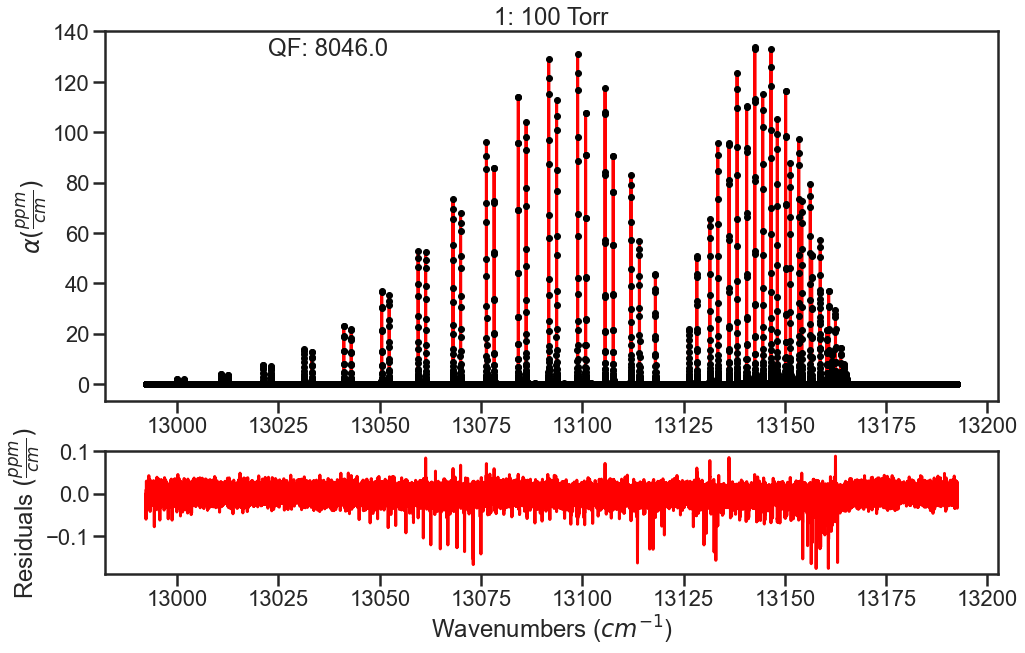

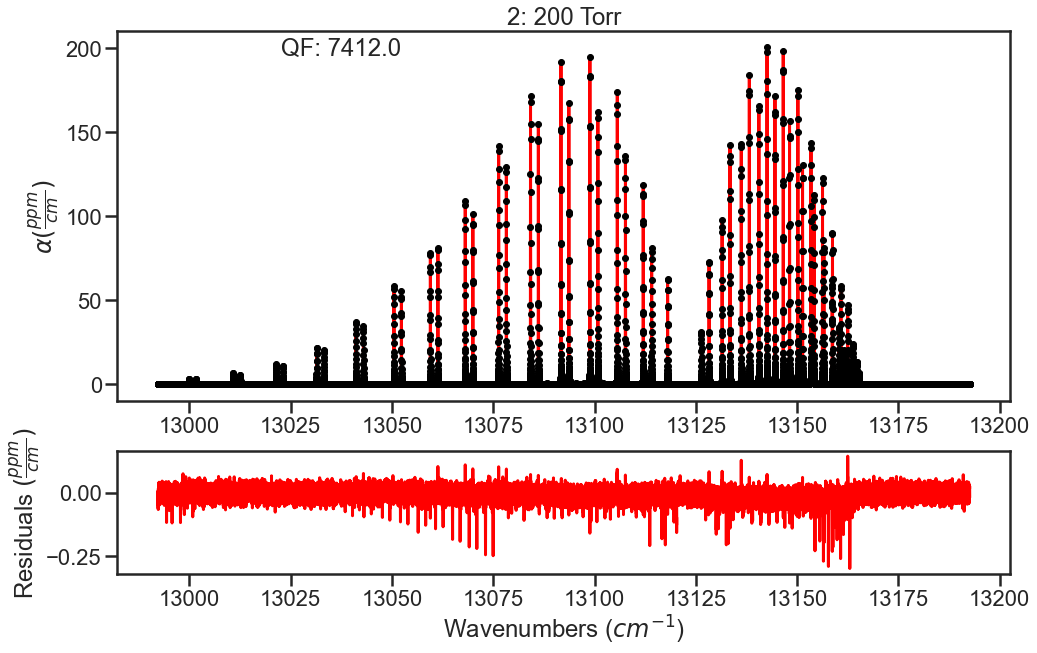

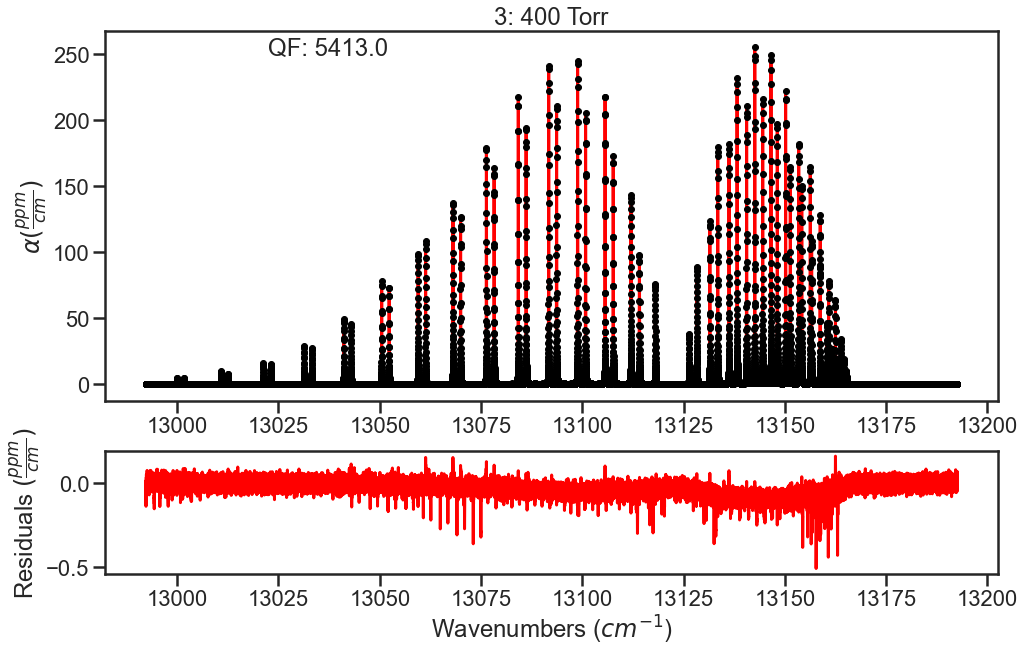

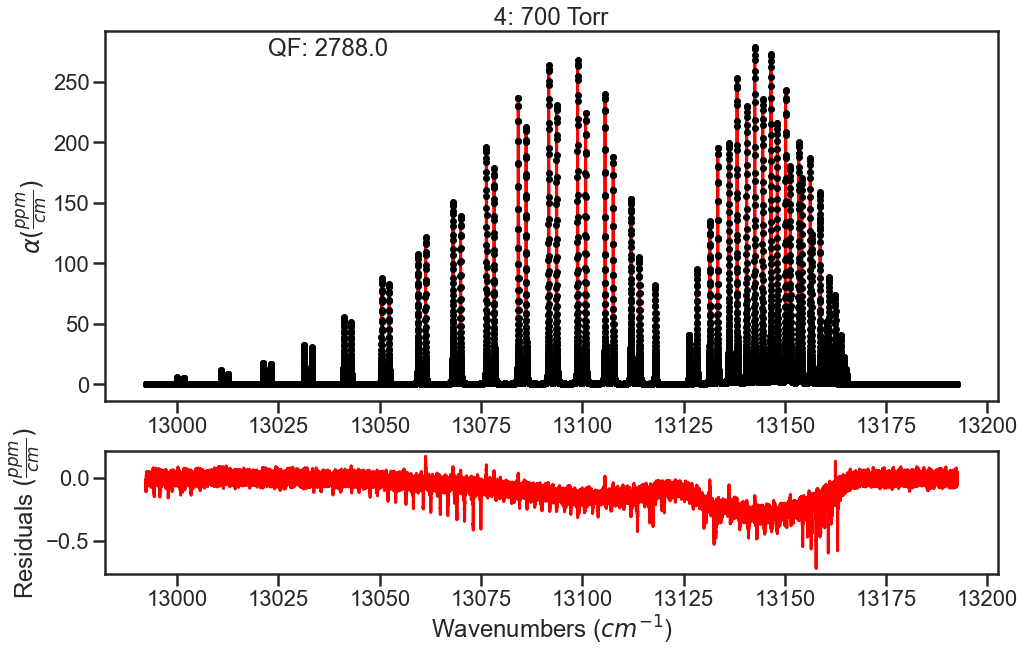

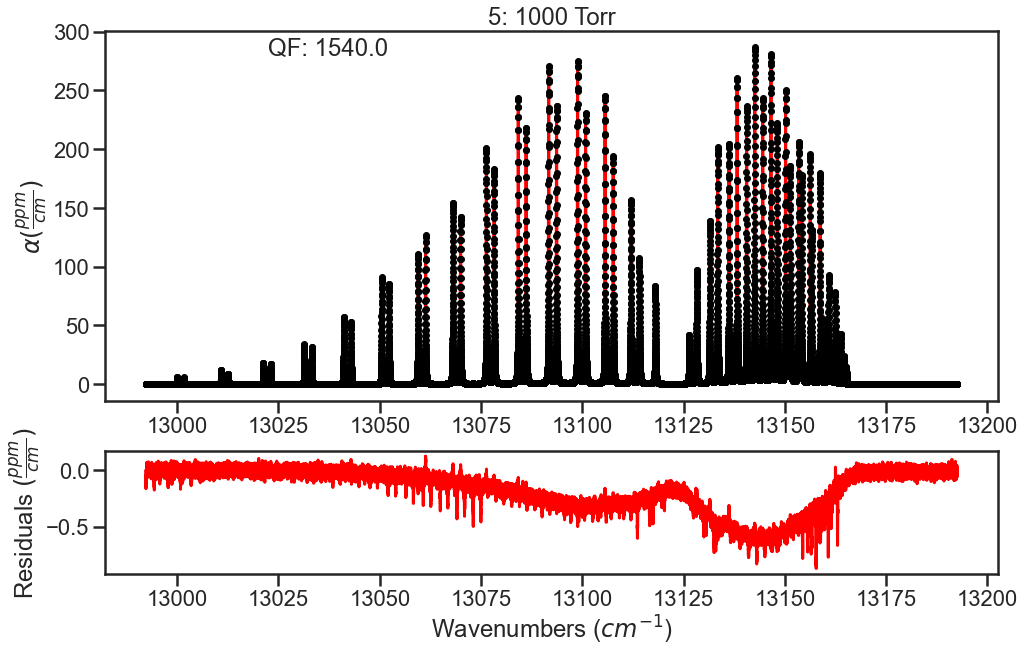

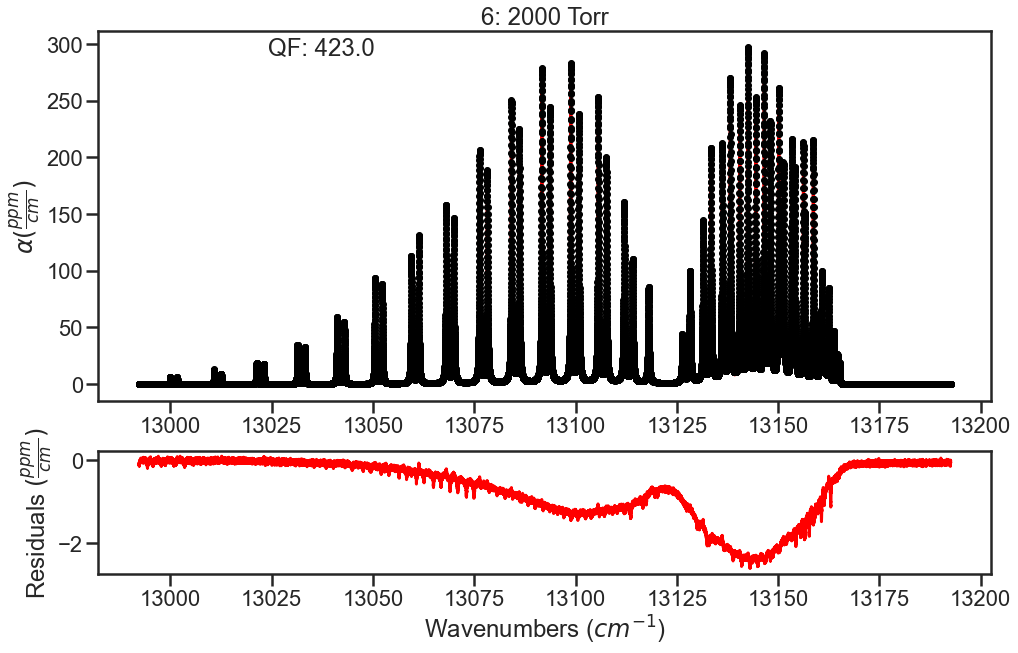

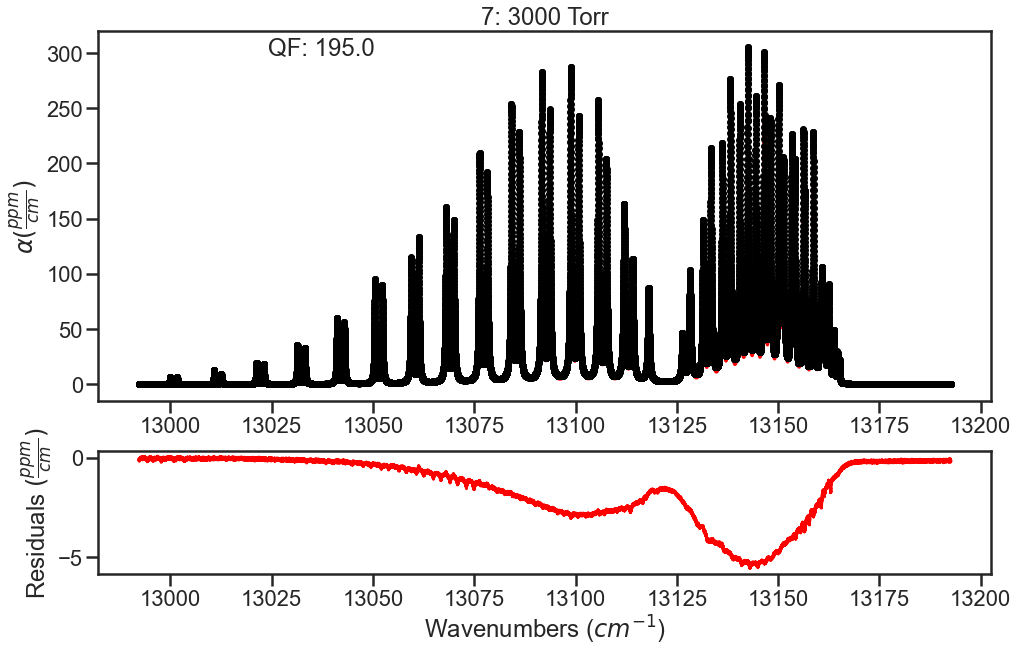

,Spectrum Number,Spectrum Name,Frequency (MHz),Wavenumber (cm-1),Pressure (Torr),Temperature (C),Tau (us),Tau Error (%),Alpha (ppm/cm),Model (ppm/cm),Residuals (ppm/cm),QF,Background,CIA (ppm/cm)
0,1,100 Torr,3.894976e+08,12992.240,100.0,25.0,16004.320115,0,0.002084,0.000021,-0.002063,8046.0,0.0,0
1,1,100 Torr,3.894977e+08,12992.246,100.0,25.0,3936.671355,0,0.008473,0.000021,-0.008452,8046.0,0.0,0
2,1,100 Torr,3.894979e+08,12992.252,100.0,25.0,5691.690989,0,0.005861,0.000021,-0.005840,8046.0,0.0,0
3,1,100 Torr,3.894981e+08,12992.258,100.0,25.0,1046.679855,0,0.031869,0.000021,-0.031848,8046.0,0.0,0
4,1,100 Torr,3.894983e+08,12992.264,100.0,25.0,4650.263749,0,0.007173,0.000021,-0.007152,8046.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33390,7,3000 Torr,3.955036e+08,13192.580,3000.0,25.0,579.686835,0,0.057542,-0.007815,-0.065358,195.0,0.0,0
33391,7,3000 Torr,3.955038e+08,13192.586,3000.0,25.0,168.204864,0,0.198308,-0.016017,-0.214325,195.0,0.0,0
33392,7,3000 Torr,3.955040e+08,13192.592,3000.0,25.0,286.509750,0,0.116423,-0.016020,-0.132443,195.0,0.0,0
33393,7,3000 Torr,3.955041e+08,13192.598,3000.0,25.0,182.669788,0,0.182605,-0.016022,-0.198627,195.0,0.0,0


In [4]:
# Look at the spectra using just the Drouin LInelist
FITPARAMS = Generate_FitParam_File(SPECTRA, PARAM_LINELIST, BASE_LINELIST,
                                   lineprofile = 'SDVP', linemixing = True, 
                                      fit_intensity = Fit_Intensity, threshold_intensity = Fit_Intensity, 
                                      nu_constrain = True, sw_constrain = True, gamma0_constrain = True, delta0_constrain = True, 
                                       aw_constrain = True, as_constrain = True, 
                                       nuVC_constrain = True, eta_constrain =True, linemixing_constrain = True)


FITPARAMS.generate_fit_param_linelist_from_linelist(vary_nu = {7:{1:False, 2:False, 3:False}}, vary_sw = {7:{1:False, 2:False, 3:False}},
                                                    vary_gamma0 = {7:{1: False, 2:False, 3: False}}, vary_n_gamma0 = {7:{1:False}}, 
                                                    vary_delta0 = {7:{1: False, 2:False, 3: False}}, vary_n_delta0 = {7:{1:False}}, 
                                                    vary_aw = {7:{1: False, 2:False, 3: False}}, vary_n_gamma2 = {7:{1:False}}, 
                                                    vary_as = {7:{1:False}}, vary_n_delta2 = {7:{1:False}}, 
                                                    vary_nuVC = {7:{1:False}}, vary_n_nuVC = {7:{1:False}},
                                                    vary_eta = {}, vary_linemixing = {7:{1:False}})

FITPARAMS.generate_fit_baseline_linelist(vary_baseline = False, vary_molefraction = {7:False, 1:False}, vary_xshift = False, 
                                      vary_etalon_amp= False, vary_etalon_period= False, vary_etalon_phase= False)


fit_data = Fit_DataSet(SPECTRA,'Baseline_LineList', 'Parameter_LineList',
                       minimum_parameter_fit_intensity = Fit_Intensity)
params = fit_data.generate_params()
    

result = fit_data.fit_data(params, wing_wavenumbers = 50, wing_method = 'wing_wavenumbers', xtol = 1e-7, maxfev = 2000, ftol = 1e-7)

#print (result.params.pretty_print())

fit_data.residual_analysis(result, indv_resid_plot=True)
fit_data.update_params(result)
SPECTRA.generate_summary_file(save_file = True)

A simple function is defined to  treat the CIA as the smooth residuals.  To do this we will use a filter to smooth over any resonant absorbance and then define the CIA as the negative of what is leftover.  This is done for all spectra making up the dataset. 

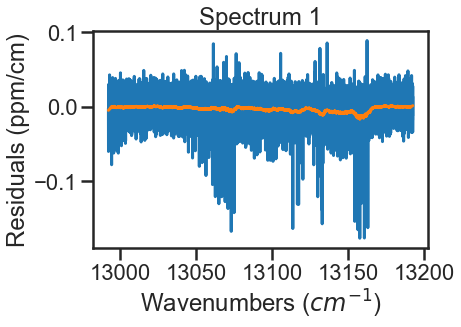

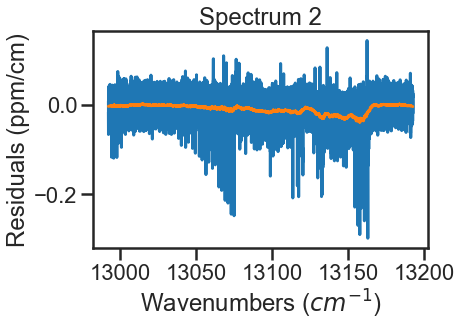

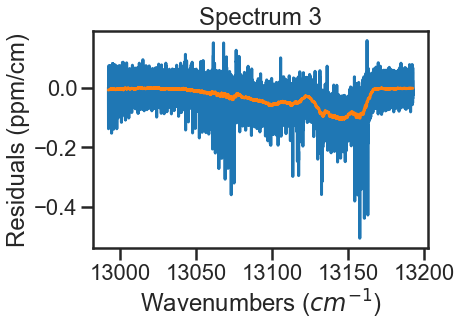

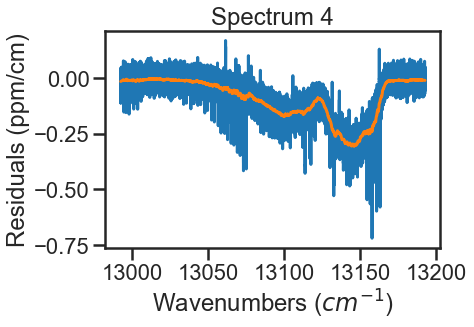

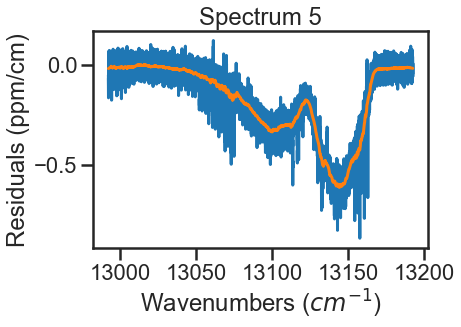

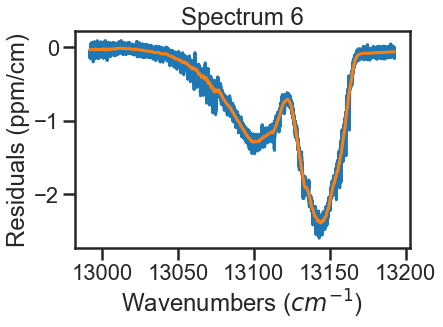

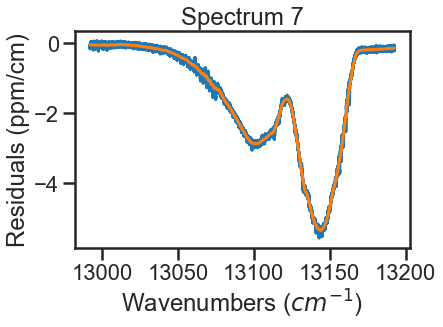

In [5]:
#Option 1 would be to 

from scipy.signal import savgol_filter

def ad_hoc_CIA(spec):
    
    waves = spec.wavenumber
    resds = spec.residuals

    CIA = savgol_filter(resds, 501, 1) # Savitsky Golay Filte that uses a 501 pt sliding window with a first order polynomial to smooth the data.  These settings were arbitrary to smooth out the data.
    plt.plot(waves, resds)
    plt.plot(waves, CIA)
    plt.xlabel('Wavenumbers ($cm^{-1}$)')
    plt.ylabel('Residuals (ppm/cm)')
    plt.title( 'Spectrum '+ str(spec.spectrum_number))
    plt.show()
    spec.set_cia(-1*CIA)
ad_hoc_CIA(spec_1)
ad_hoc_CIA(spec_2)
ad_hoc_CIA(spec_3)
ad_hoc_CIA(spec_4)
ad_hoc_CIA(spec_5)
ad_hoc_CIA(spec_6)
ad_hoc_CIA(spec_7)

Spectra are evaluated again and we see that the fits have improved.  To further improve fits, I would optimize line parameters in small wavenumber sections using the baseline parameter to account for remaining CIA.  These line shape parameters  could then be used in evaluation of the full band (like above) and then the CIA column could be ammended based on those results.  Iterating on these steps should allow for optimization of both the line shape parameters and the CIA>    

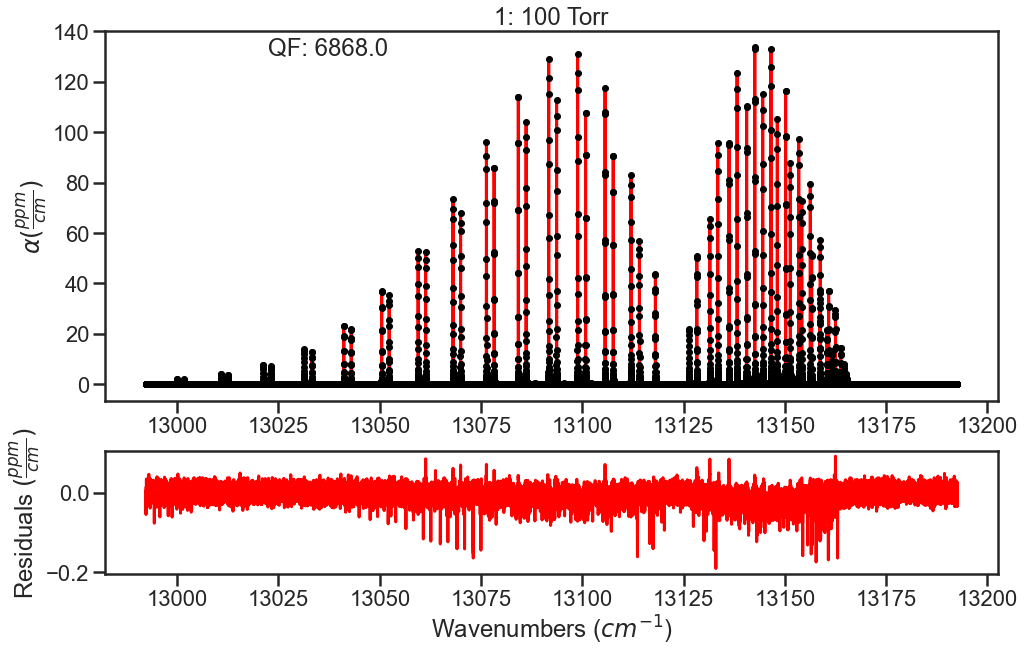

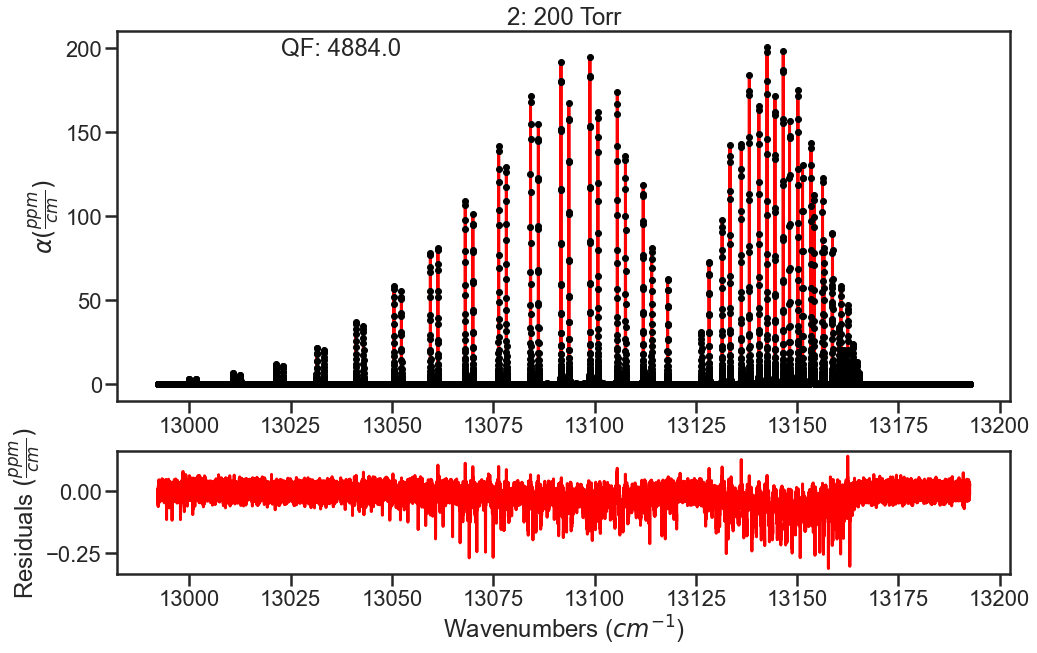

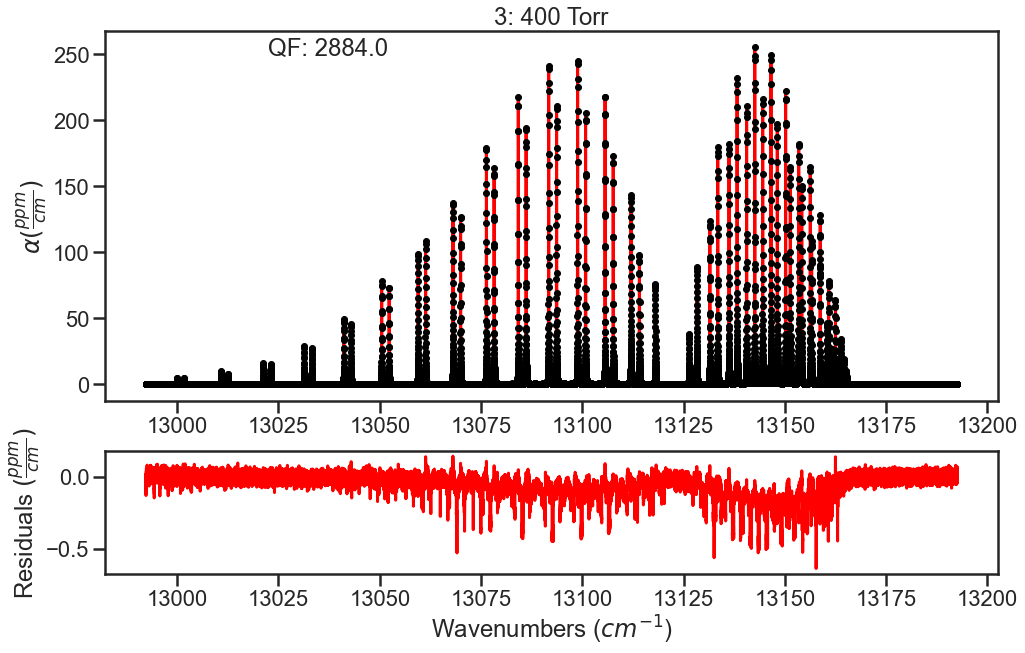

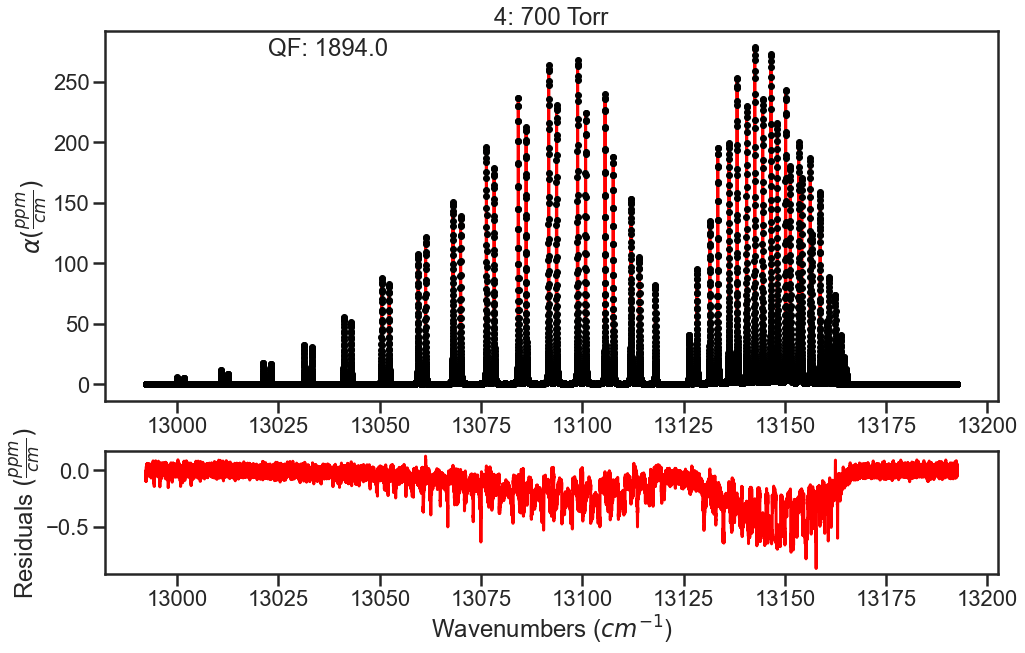

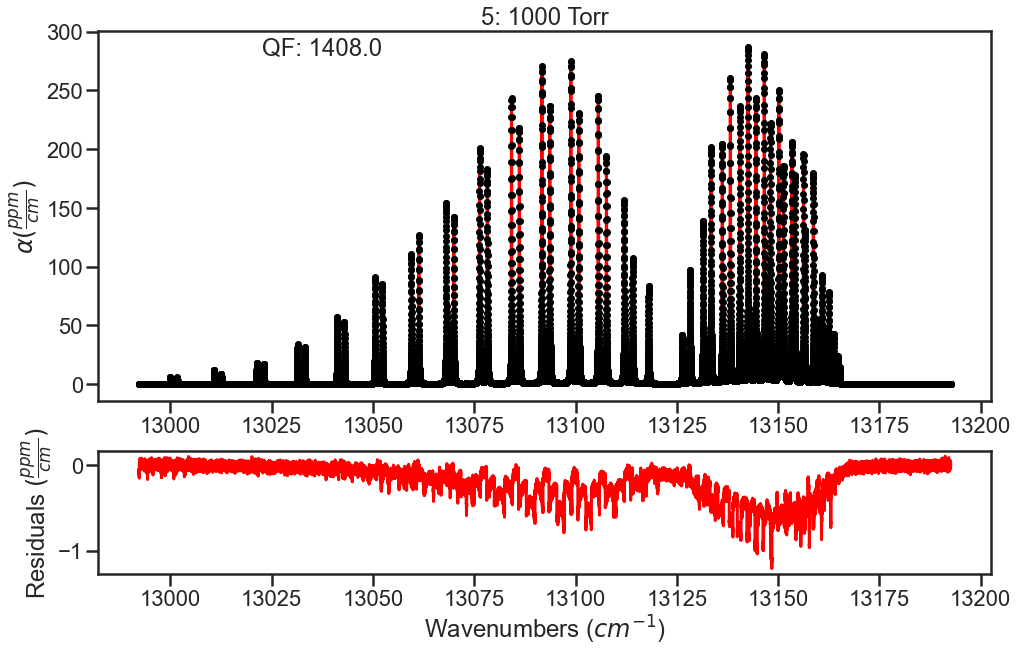

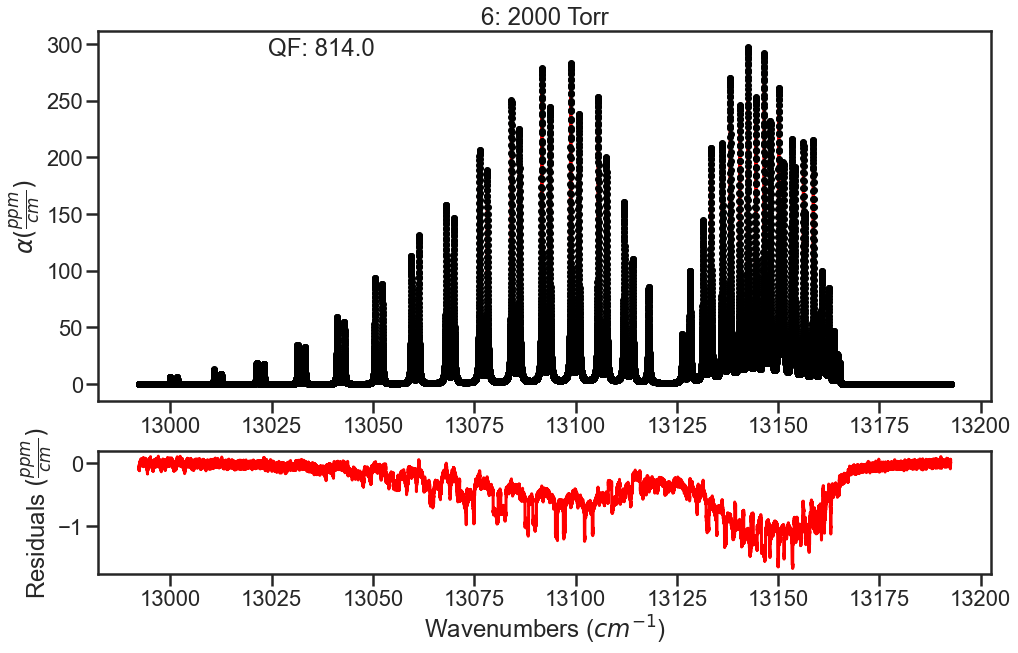

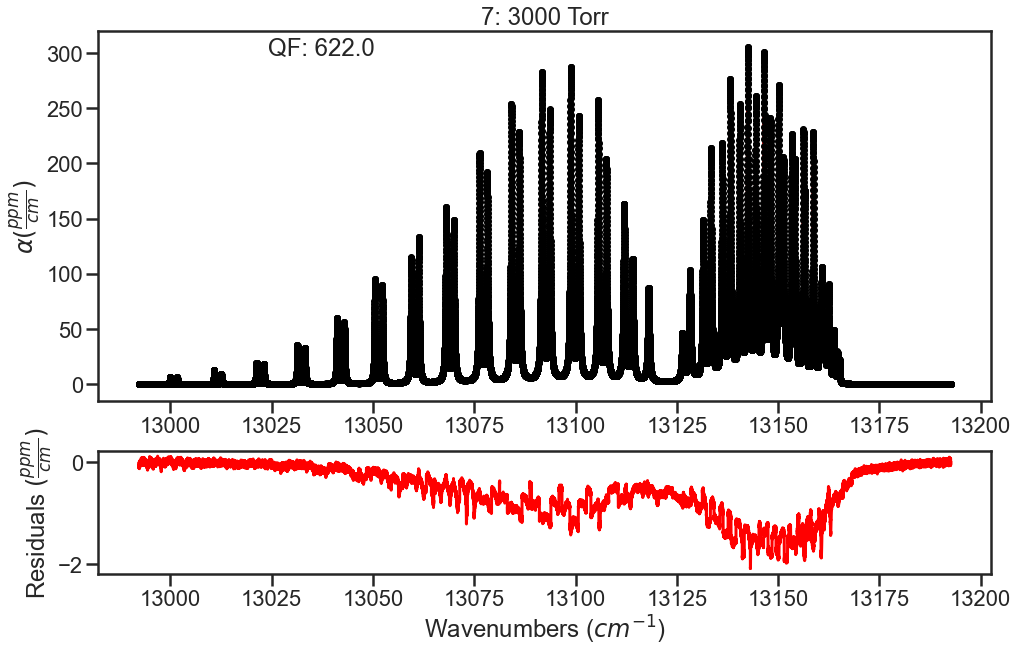

,Spectrum Number,Spectrum Name,Frequency (MHz),Wavenumber (cm-1),Pressure (Torr),Temperature (C),Tau (us),Tau Error (%),Alpha (ppm/cm),Model (ppm/cm),Residuals (ppm/cm),QF,Background,CIA (ppm/cm)
0,1,100 Torr,3.894976e+08,12992.240,100.0,25.0,16004.320115,0,0.002084,0.004907,0.002823,6868.0,0.0,0.004907
1,1,100 Torr,3.894977e+08,12992.246,100.0,25.0,3936.671355,0,0.008473,0.004895,-0.003579,6868.0,0.0,0.004895
2,1,100 Torr,3.894979e+08,12992.252,100.0,25.0,5691.690989,0,0.005861,0.004882,-0.000978,6868.0,0.0,0.004882
3,1,100 Torr,3.894981e+08,12992.258,100.0,25.0,1046.679855,0,0.031869,0.004869,-0.026999,6868.0,0.0,0.004869
4,1,100 Torr,3.894983e+08,12992.264,100.0,25.0,4650.263749,0,0.007173,0.004857,-0.002316,6868.0,0.0,0.004857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33390,7,3000 Torr,3.955036e+08,13192.580,3000.0,25.0,579.686835,0,0.057542,0.135671,0.078129,622.0,0.0,0.135671
33391,7,3000 Torr,3.955038e+08,13192.586,3000.0,25.0,168.204864,0,0.198308,0.135644,-0.062664,622.0,0.0,0.135644
33392,7,3000 Torr,3.955040e+08,13192.592,3000.0,25.0,286.509750,0,0.116423,0.135618,0.019195,622.0,0.0,0.135618
33393,7,3000 Torr,3.955041e+08,13192.598,3000.0,25.0,182.669788,0,0.182605,0.135591,-0.047014,622.0,0.0,0.135591


In [6]:
# Look at the results of using the "Leftover CIA"
fit_data = Fit_DataSet(SPECTRA,'Baseline_LineList', 'Parameter_LineList',
                       minimum_parameter_fit_intensity = Fit_Intensity)
params = fit_data.generate_params()
    

result = fit_data.fit_data(params, wing_wavenumbers = 25, wing_method = 'wing_cutoff', xtol = 1e-7, maxfev = 2000, ftol = 1e-7)

#print (result.params.pretty_print())

fit_data.residual_analysis(result, indv_resid_plot=True)
fit_data.update_params(result)
SPECTRA.generate_summary_file(save_file = True)